In [10]:
import pickle
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

# eval
### (Standard function set without the Ryan Lang Benchmark functions)

In [11]:
with open('/home/dve/Desktop/calypso/misc/agg_np_eval.pkl', 'rb') as f:
    agg_np_eval = pickle.load(f)

mean_perf = {k: v.mean() for k, v in agg_np_eval.items()}
# sort the mean_perf dictionary by value
mean_perf = {k: v for k, v in sorted(mean_perf.items(), key=lambda item: item[1])}

# take first 20
mean_perf = {k: v for k, v in list(mean_perf.items())[:20]}

In [12]:
from scipy.stats import friedmanchisquare

# Assume `scores` is your dictionary of scores

# Separate the dictionary into individual arrays
arrays = [v for v in agg_np_eval.values()]

# Perform the Friedman test
stat, p = friedmanchisquare(*arrays)

# Print the test statistic and p-value
print(f"Friedman test statistic: {stat}")
print(f"P-value: {p}")

# Interpret the result
if p < 0.05:
    print("There is a statistically significant difference in performance between the algorithms.")
else:
    print("There is no statistically significant difference in performance between the algorithms.")

Friedman test statistic: 2660.784892541087
P-value: 0.0
There is a statistically significant difference in performance between the algorithms.


In [13]:
from scipy.stats import mannwhitneyu
from itertools import combinations

# Calculate the number of comparisons 
num_comparisons = len(agg_np_eval) * (len(agg_np_eval) - 1) / 2

# Corrected alpha level
alpha = 0.05 / num_comparisons

# Get the names of all algorithms
alg_names = list(agg_np_eval.keys())

# Perform the Mann-Whitney U tests
for alg1, alg2 in combinations(alg_names, 2):
    stat, p = mannwhitneyu(agg_np_eval[alg1], agg_np_eval[alg2], alternative='two-sided')
    
    # Print the test statistic and p-value

    # Define substrings to check for in alg1 and alg2
    substrings = ['vc_sac', 'vc_fixed']
    
    # Check if any of the substrings are in alg1 or alg2
    if any((sub in alg1 and 'PSO-IW' in alg2) or (sub in alg2 and 'PSO-IW' in alg1) for sub in substrings):
        print(f"\nComparison: {alg1} vs {alg2}")
        print(f"Mann-Whitney U test statistic: {stat}")
        print(f"P-value: {p}")
        if p < alpha:
            print(f"There is a statistically significant difference in performance between {alg1} and {alg2}.")
        else:
            print(f"There is no statistically significant difference in performance between {alg1} and {alg2}.")


Comparison: vc_sac_j100 vs PSO-IW
Mann-Whitney U test statistic: 0.0
P-value: 3.019859359162157e-11
There is a statistically significant difference in performance between vc_sac_j100 and PSO-IW.

Comparison: vc_fixed200_elitist30 vs PSO-IW
Mann-Whitney U test statistic: 161.0
P-value: 1.9962775390084076e-05
There is no statistically significant difference in performance between vc_fixed200_elitist30 and PSO-IW.

Comparison: vc_sac_j10 vs PSO-IW
Mann-Whitney U test statistic: 6.0
P-value: 5.494052450965186e-11
There is a statistically significant difference in performance between vc_sac_j10 and PSO-IW.

Comparison: vc_sac_jauto vs PSO-IW
Mann-Whitney U test statistic: 0.0
P-value: 3.019859359162157e-11
There is a statistically significant difference in performance between vc_sac_jauto and PSO-IW.

Comparison: vc_sac_j125 vs PSO-IW
Mann-Whitney U test statistic: 0.0
P-value: 3.019859359162157e-11
There is a statistically significant difference in performance between vc_sac_j125 and PSO-

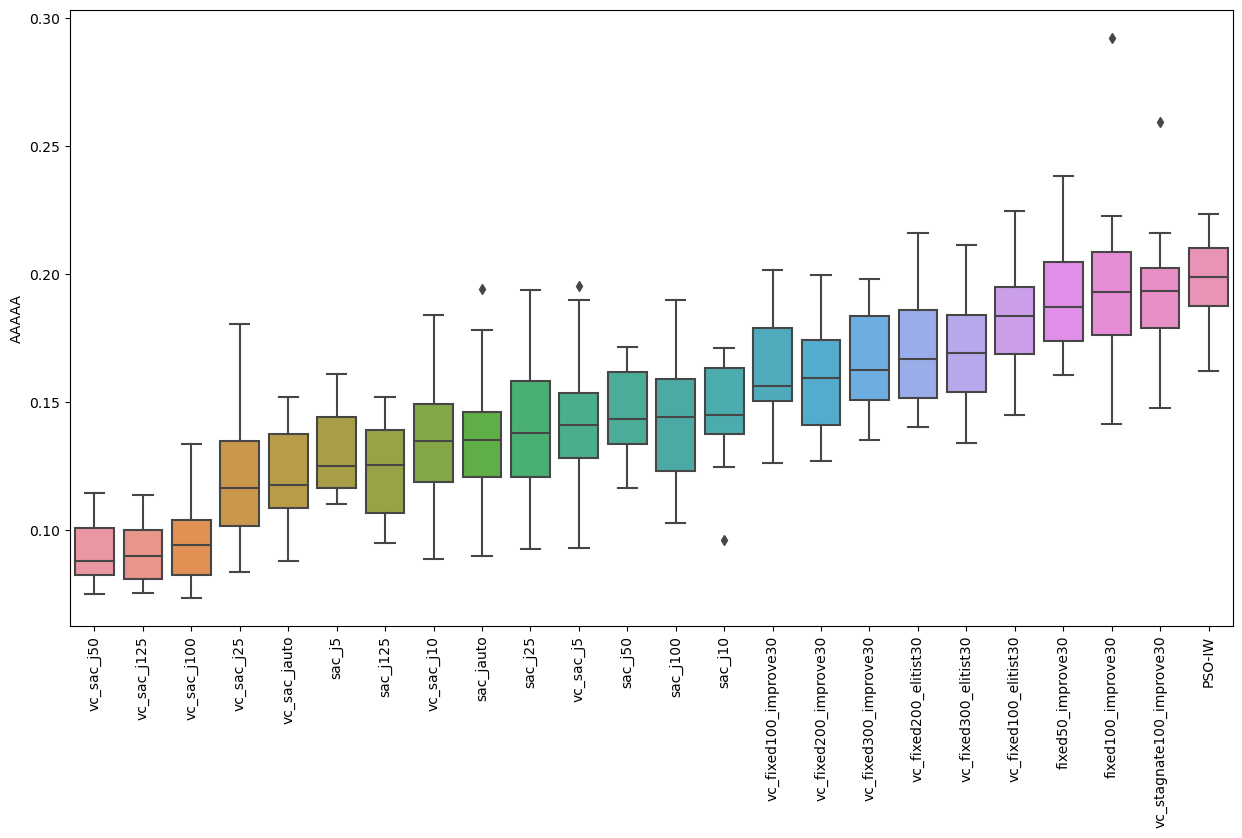

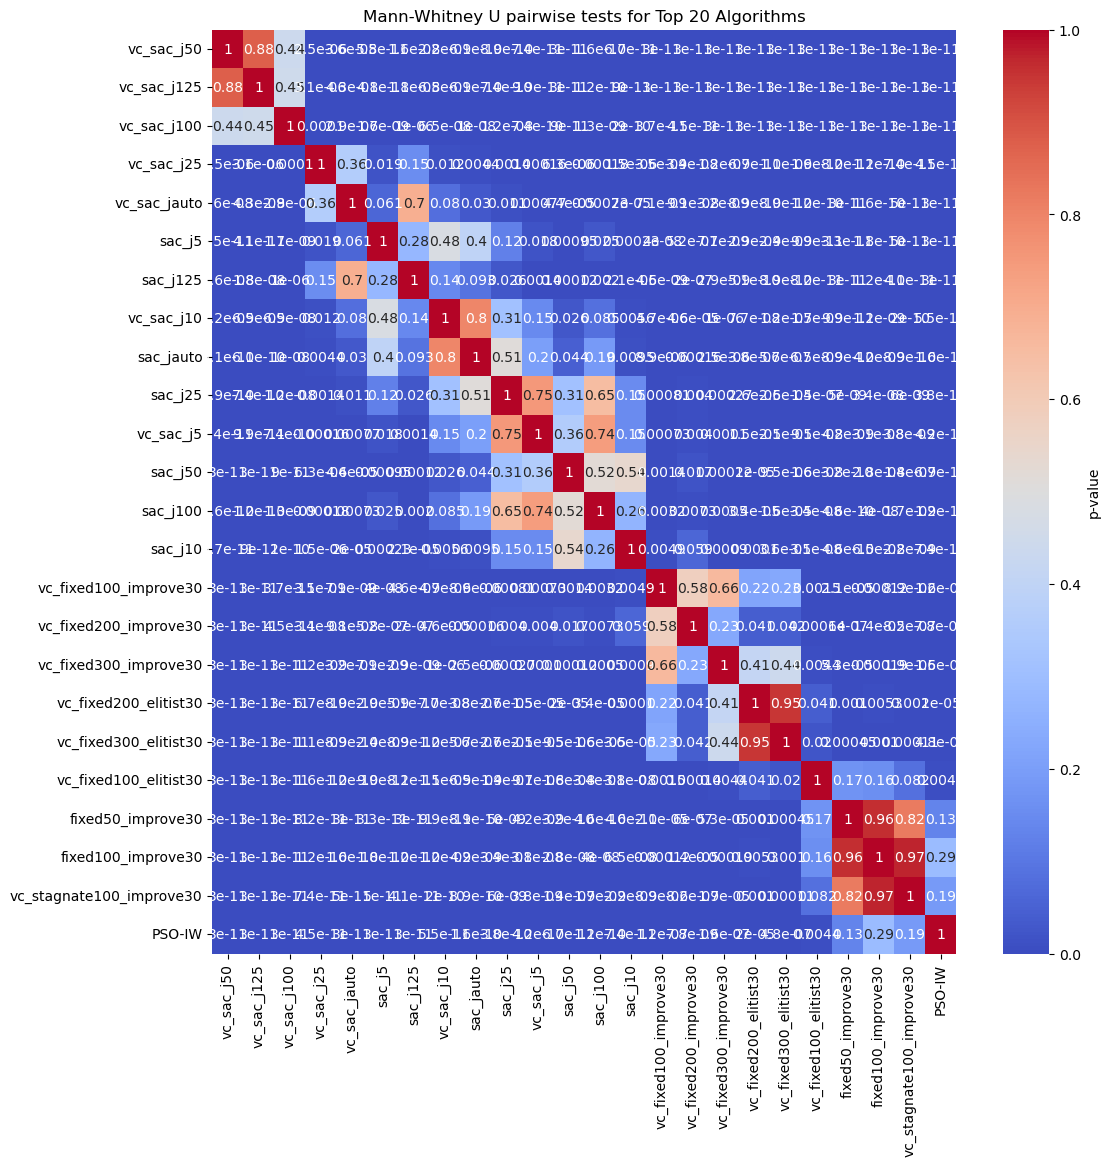

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create a DataFrame from the agg_np_eval dictionary for easier plotting
df = pd.DataFrame(agg_np_eval)

# Calculate the median of each algorithm and sort by it
medians = df.median().sort_values(ascending=True)
sorted_alg_names = medians.index.tolist()

# Select the top 20 performing algorithms
top_algos = sorted_alg_names[:24]

# Filter the dataframe to include only the top 20
df_sorted_top = df[top_algos]

# Box plot for top 20
plt.figure(figsize=(15,8))
sns.boxplot(data=df_sorted_top)
# plt.title('Performance of Top 20 Algorithms')
plt.ylabel('AAAAA')
plt.xticks(rotation=90)
plt.show()

# Matrix of p-values for top 20
p_values_top = np.zeros((len(top_algos), len(top_algos)))

for i, alg1 in enumerate(top_algos):
    for j, alg2 in enumerate(top_algos):
        _, p = mannwhitneyu(agg_np_eval[alg1], agg_np_eval[alg2], alternative='two-sided')
        p_values_top[i, j] = p

# Create a DataFrame from the matrix for easier plotting
df_p_top_20 = pd.DataFrame(p_values_top, index=top_algos, columns=top_algos)

plt.figure(figsize=(12,12))
sns.heatmap(df_p_top_20, annot=True, cmap='coolwarm', cbar_kws={'label': 'p-value'})
plt.title('Mann-Whitney U pairwise tests for Top 20 Algorithms')
plt.show()


# test

### (Ryan Lang Benchmark functions)

In [15]:
with open('/home/dve/Desktop/calypso/misc/agg_np_test.pkl', 'rb') as f:
    agg_np_test = pickle.load(f)

mean_perf = {k: v.mean() for k, v in agg_np_test.items()}
# sort the mean_perf dictionary by value
mean_perf = {k: v for k, v in sorted(mean_perf.items(), key=lambda item: item[1])}
# take first 18
mean_perf = {k: v for k, v in list(mean_perf.items())[:20]}
mean_perf

{'vc_sac_j50': 0.05840619083683274,
 'vc_sac_j25': 0.06443814710445342,
 'vc_sac_j100': 0.06471620192994801,
 'vc_sac_j125': 0.06552609143915854,
 'vc_sac_jauto': 0.06640403879480278,
 'sac_j100': 0.06782185815865792,
 'sac_j25': 0.07269944387824961,
 'sac_j125': 0.0733884021619464,
 'vc_sac_j10': 0.07405173006494795,
 'vc_fixed100_improve30': 0.0744027130757026,
 'sac_j10': 0.07577232231535778,
 'sac_j50': 0.07615212699352489,
 'sac_jauto': 0.07699425773567008,
 'vc_fixed200_improve30': 0.07826554914967161,
 'PSO-IW': 0.08084702387676851,
 'vc_fixed300_improve30': 0.08127211690296031,
 'vc_fixed300_elitist30': 0.08143609878973561,
 'vc_fixed200_elitist30': 0.0816038484866425,
 'vc_fixed100_elitist30': 0.08195798287314755,
 'fixed50_improve30': 0.08528326195734048}

In [16]:
from scipy.stats import friedmanchisquare

# Assume `scores` is your dictionary of scores

# Separate the dictionary into individual arrays
arrays = [v for v in agg_np_test.values()]

# Perform the Friedman test
stat, p = friedmanchisquare(*arrays)

# Print the test statistic and p-value
print(f"Friedman test statistic: {stat}")
print(f"P-value: {p}")

# Interpret the result
if p < 0.05:
    print("There is a statistically significant difference in performance between the algorithms.")
else:
    print("There is no statistically significant difference in performance between the algorithms.")

Friedman test statistic: 2736.0245891276863
P-value: 0.0
There is a statistically significant difference in performance between the algorithms.


In [17]:
from scipy.stats import mannwhitneyu
from itertools import combinations

# Calculate the number of comparisons 
num_comparisons = len(agg_np_test) * (len(agg_np_test) - 1) / 2

# Corrected alpha level
alpha = 0.05 / num_comparisons

# Get the names of all algorithms
alg_names = list(agg_np_test.keys())

# Perform the Mann-Whitney U tests
for alg1, alg2 in combinations(alg_names, 2):
    stat, p = mannwhitneyu(agg_np_test[alg1], agg_np_test[alg2], alternative='two-sided')
    
    # Print the test statistic and p-value

    # Define substrings to check for in alg1 and alg2
    substrings = ['vc_sac', 'vc_fixed']
    
    # Check if any of the substrings are in alg1 or alg2
    if any((sub in alg1 and 'PSO-IW' in alg2) or (sub in alg2 and 'PSO-IW' in alg1) for sub in substrings):
        print(f"\nComparison: {alg1} vs {alg2}")
        print(f"Mann-Whitney U test statistic: {stat}")
        print(f"P-value: {p}")
        if p < alpha:
            print(f"There is a statistically significant difference in performance between {alg1} and {alg2}.")
        else:
            print(f"There is no statistically significant difference in performance between {alg1} and {alg2}.")


Comparison: vc_sac_j100 vs PSO-IW
Mann-Whitney U test statistic: 53.0
P-value: 4.572570439873648e-09
There is a statistically significant difference in performance between vc_sac_j100 and PSO-IW.

Comparison: vc_fixed200_elitist30 vs PSO-IW
Mann-Whitney U test statistic: 457.0
P-value: 0.9234421319782358
There is no statistically significant difference in performance between vc_fixed200_elitist30 and PSO-IW.

Comparison: vc_sac_j10 vs PSO-IW
Mann-Whitney U test statistic: 232.0
P-value: 0.0013016645094378993
There is no statistically significant difference in performance between vc_sac_j10 and PSO-IW.

Comparison: vc_sac_jauto vs PSO-IW
Mann-Whitney U test statistic: 89.0
P-value: 9.83289055492182e-08
There is a statistically significant difference in performance between vc_sac_jauto and PSO-IW.

Comparison: vc_sac_j125 vs PSO-IW
Mann-Whitney U test statistic: 65.0
P-value: 1.3111030420756061e-08
There is a statistically significant difference in performance between vc_sac_j125 and PS

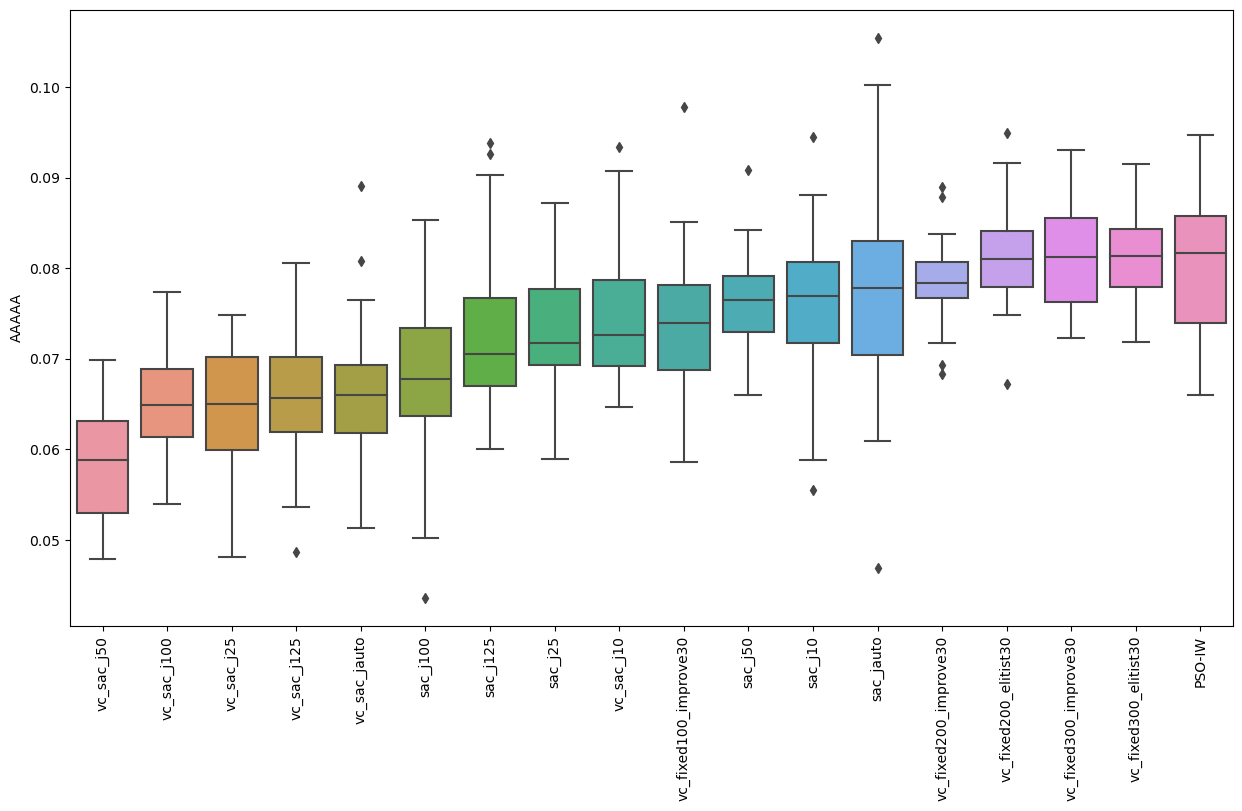

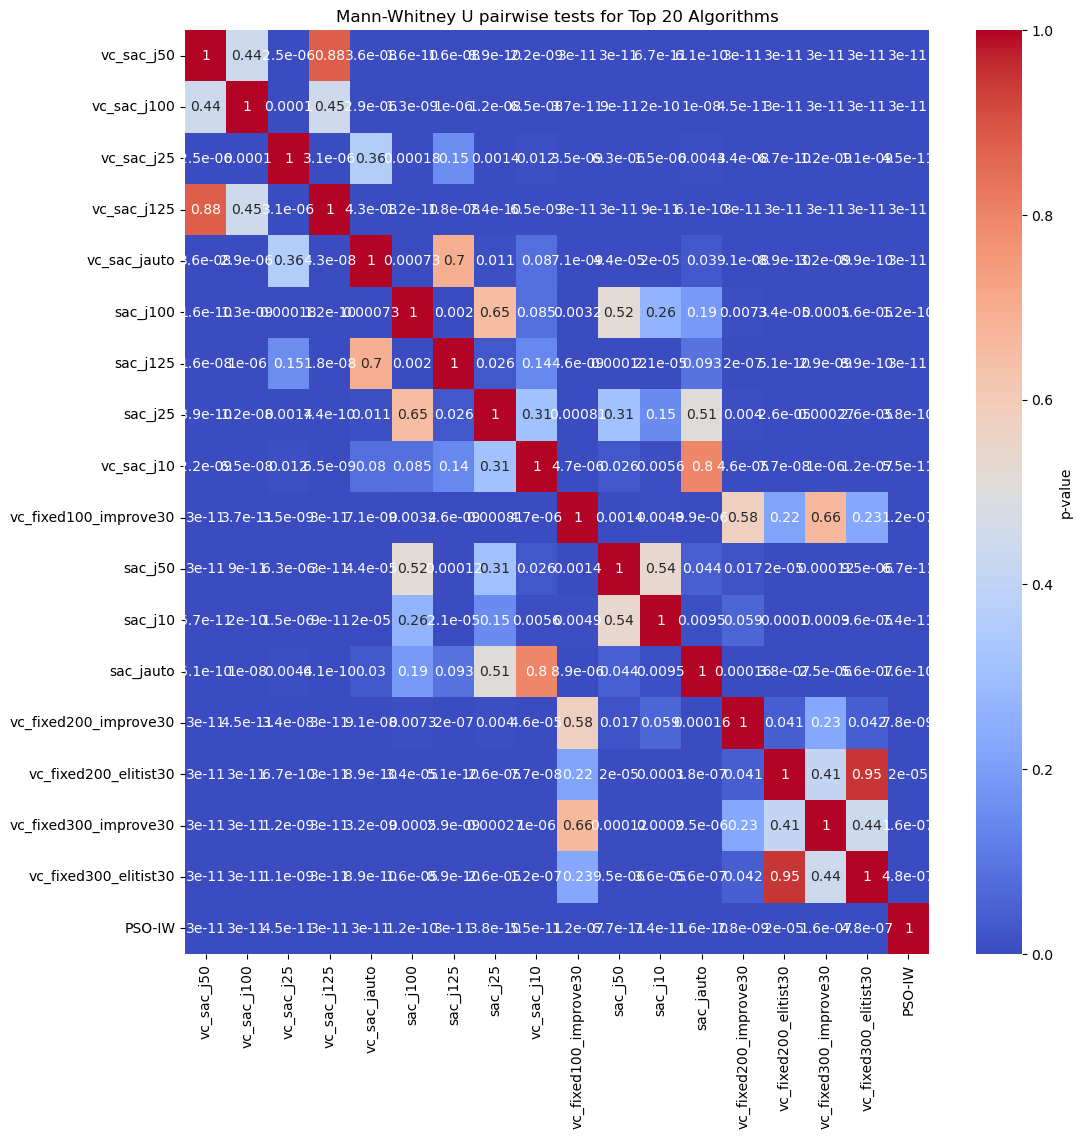

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create a DataFrame from the agg_np_eval dictionary for easier plotting
df = pd.DataFrame(agg_np_test)

# Calculate the median of each algorithm and sort by it
medians = df.median().sort_values(ascending=True)
sorted_alg_names = medians.index.tolist()

# Select the top 20 performing algorithms
top_algos = sorted_alg_names[:18]

# Filter the dataframe to include only the top 20
df_sorted_top = df[top_algos]

# Box plot for top 20
plt.figure(figsize=(15,8))
sns.boxplot(data=df_sorted_top)
# plt.title('Performance of Top 20 Algorithms')
plt.ylabel('AAAAA')
plt.xticks(rotation=90)
plt.show()

# Matrix of p-values for top 20
p_values_top = np.zeros((len(top_algos), len(top_algos)))

for i, alg1 in enumerate(top_algos):
    for j, alg2 in enumerate(top_algos):
        _, p = mannwhitneyu(agg_np_eval[alg1], agg_np_eval[alg2], alternative='two-sided')
        p_values_top[i, j] = p

# Create a DataFrame from the matrix for easier plotting
df_p_top_20 = pd.DataFrame(p_values_top, index=top_algos, columns=top_algos)

plt.figure(figsize=(12,12))
sns.heatmap(df_p_top_20, annot=True, cmap='coolwarm', cbar_kws={'label': 'p-value'})
plt.title('Mann-Whitney U pairwise tests for Top 20 Algorithms')
plt.show()